# Entrega 4
### Ignacio Ziccardi
### Simulación de un ADC (cuantización y alias)


In [199]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 23 09:26:57 2025

@author: Ignacio
"""
import numpy as np
import matplotlib.pyplot as plt

In [200]:
#%%  Valores de parámetros
Fo = 1.0
Fs = 1000.0 # frecuencia de muestreo (Hz)
N = 1000   # cantidad de muestras
ts = 1/Fs # tiempo de muestreo
df = Fs/N # resolución espectral
Ac =2**0.5 #Amplitud 
DC = 0 #Valor Contínua
tita = 0 #Defasaje
#SNR = 20 # SNR en dB
kn=1.0#Relación de potencias de Ruido Pn = kn * Pq
B = 4 #Número de Bits
fc = 0.8 #Factor de Carga para no tener saturación del ADC por ruido en el pico de la señal
Vref = 2#Ac/fc #Tensión de referencia del ADC
q = Vref/(2**(B-1))
Pq = (q**2)/12
sigma = kn*Pq#(10**(-SNR/10)) #Varianza
desvio = sigma**0.5 #Desvío Estándar

In [201]:
#%% Funciones
def my_sin_gen( vmax, dc, fo, ph, nn, fs): 
    tt = np.arange(0,nn*1/fs,1/fs) # grilla de sampleo temporal
    xx = vmax*np.sin(2*np.pi*fo*tt + ph) + dc #Senoidal
    return [tt, xx]

def cuantificar(signal, bits, vref):
    q = vref/(2**(bits-1)) 
    #s1 = (fc*Vref/Ac)*signal
    sq = signal*(1/q)
    sq1 = np.round(sq)
    ss_cuantizada = sq1*q#*(1/(fc*Vref/Ac))
    return ss_cuantizada

## a) Generar el resultado producto de la experimentación. B = 4 bits, kn=1

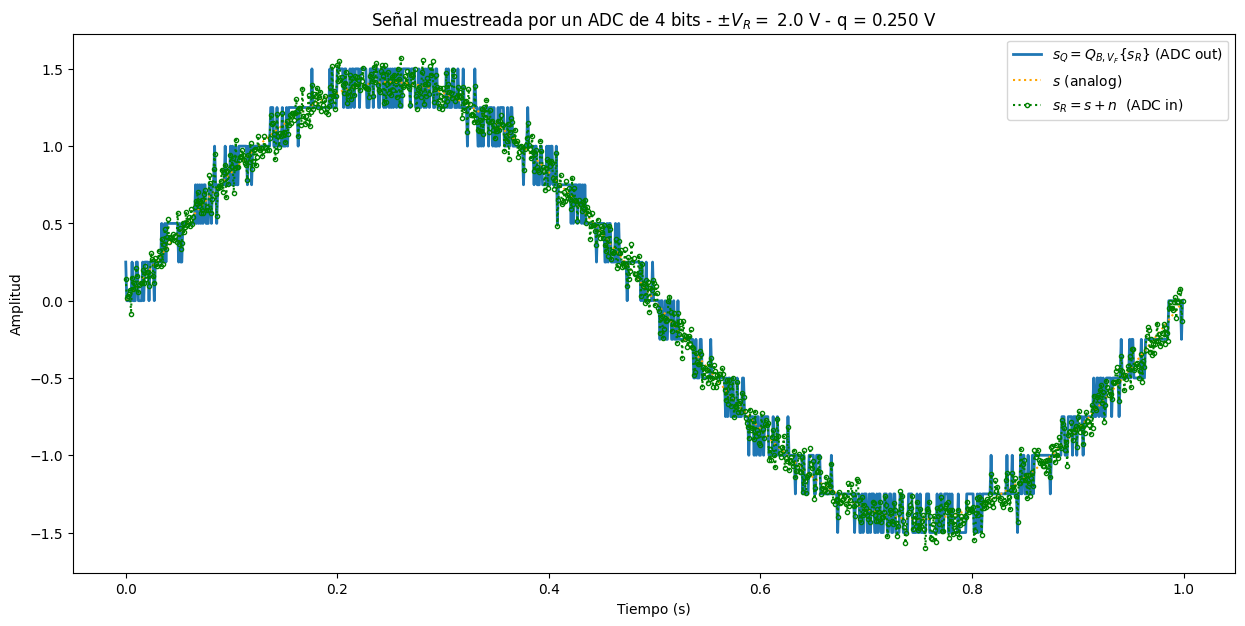

In [202]:
#%%Obtengo señal con ruido y su versión cuantizada 

tt, s = my_sin_gen(vmax = Ac, dc = DC, fo = Fo, ph=tita, nn = N, fs = Fs )
#Genero señal aleatoria para el ruido
na=np.random.normal(0, desvio, len(tt))

ss = s + na

ssq = cuantificar(signal = ss,bits = B,vref = Vref)#4Bits

#Ploteo Señal Original y dos versiones Cuantizadas para 2 valores de Bits

plt.figure("Señal original vs Cuantizada",figsize=(15, 7))
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vref, q))
plt.plot(tt, ssq, lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)')
plt.plot(tt, s, color='orange', ls='dotted', label='$ s $ (analog)')
plt.plot(tt, ss, linestyle=':', color='green',marker='o', markersize=3, markerfacecolor='none', markeredgecolor='green', fillstyle='none', label='$ s_R = s + n $  (ADC in)')
#plt.plot(tt, ss, label="Señal analógica")

plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.show()

#plt.figure("Señal Cuantizada 1",figsize=(10, 5))
#plt.plot(tt, ssq, color = 'r', label=f"Señal cuantizada con B = {B}", marker=".")
#plt.xlabel("Tiempo (s)")
#plt.ylabel("Amplitud")
#plt.legend()
#plt.show()

#plt.figure("Señal Cuantizada 2",figsize=(10, 5))
#plt.plot(tt, ssq2, color = 'g',label=f"Señal cuantizada con B = {2*B}", marker=".")
#plt.xlabel("Tiempo (s)")
#plt.ylabel("Amplitud")
#plt.legend()
#plt.show()

## Señal analógica con y sin ruido y la cuantizada
Si se aumenta el valor de B (cantidad de Bits) la senoidal se ve mucho mejor

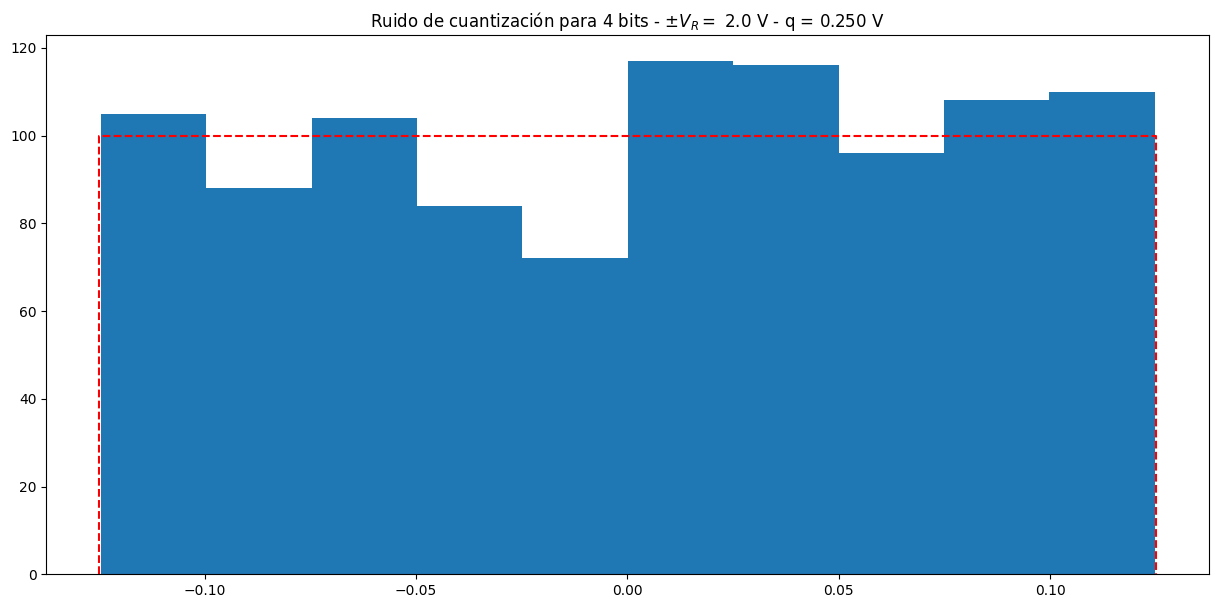

q/2= 0.125


In [203]:
Xq1 = ssq - ss#Estimación ruido de cuantización
#Xq2 = ssq2 - ss#Estimación ruido de cuantización

plt.figure("Histograma",figsize=(15, 7))
plt.title('Ruido de cuantización para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vref, q))
bins = 10
plt.hist(ssq-ss)
plt.plot( np.array([-q/2, -q/2, q/2, q/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
#plt.hist(ssq-ss)
plt.show()

#plt.figure("Histograma")
#plt.title(f"Histograma de la Diferencia entre señal Cuantizada y sin Cuantizar para {2*B} Bits")
#plt.hist(ssq2-ss)
#plt.show()

q1 = Vref/(2**(B-1))/2
#q2 = Vref/(2**(2*B-1))/2

print('q/2=',q1)#q para 4 Bits
#print('q2=',q2)#q para 8 Bits

### Se observa que el histograma va desde -q/2 hasta q/2 como se esperaba

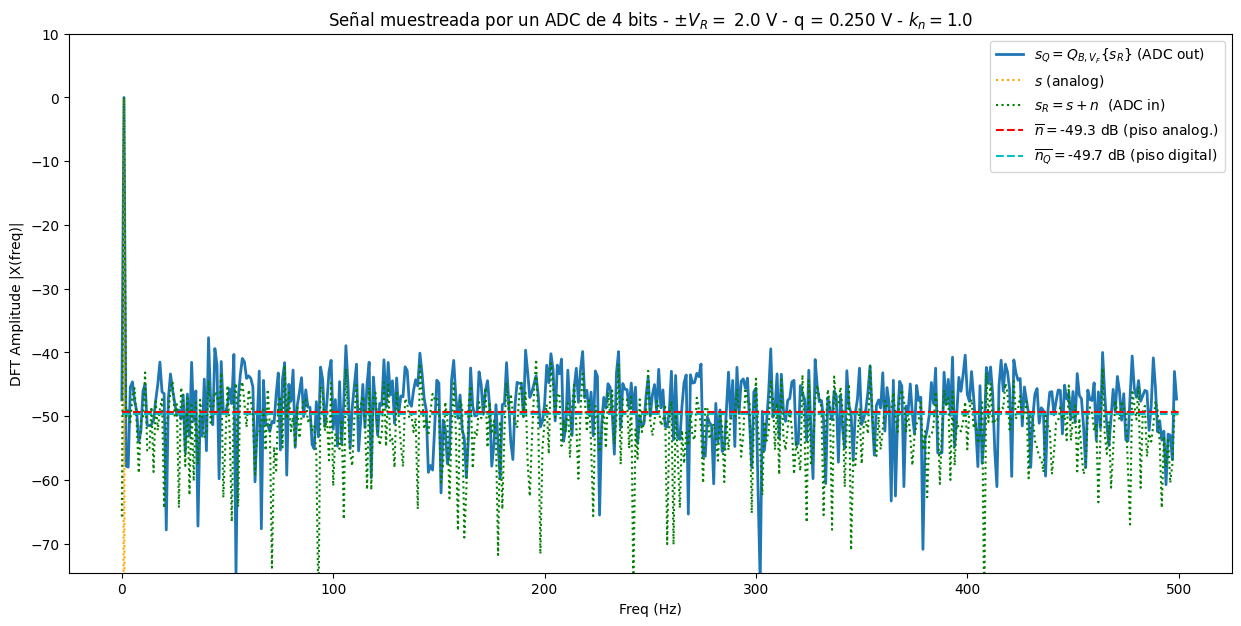

In [204]:
#%%Espectro de señal cuantizada y de la estimación de ruido
tt2=tt[0:N//2]
#Lo que Ingresa al ADC
TFF=np.fft.fft(ss)/N#Espectro de la señal que ingresa en el ADC
mod=10*np.log10(2*np.abs(TFF)**2)
#Señal Cuantizada
TFF1=np.fft.fft(ssq)/N#Espectro de la señal cuantizada
mod1=10*np.log10(2*np.abs(TFF1)**2)
#Señal Anal´´ogica sin Ruido
TFF2=np.fft.fft(s)/N#Espectro de la señal sin ruido
mod2=10*np.log10(2*np.abs(TFF2)**2)
#Ruido Analógico
TFFean=np.fft.fft(na)/N#Espectro de la estimacion de ruido de cuantizacion
modea=10*np.log10(2*np.abs(TFFean)**2)
#Ruido de Cuantización
TFFq1=np.fft.fft(Xq1)/N#Espectro del ruido 4 Bits
modq1=10*np.log10(2*np.abs(TFFq1)**2)#10*np.log10(escala)

Nq = np.mean(np.abs(TFFq1**2))
NqdB=10*np.log10(2*Nq)#10*np.log10(escala)
ff = tt2*len(tt2)*df*2

Na = np.mean(np.abs(TFFean**2))
NadB=10*np.log10(2*Na)
#tfrec = tt <= Fs/2
#t=(len(tt)/2)-1
#plt.figure("DFT Senoidal Cuantizada vs Sin Cuantizar",figsize=(10, 5))
#plt.title("DFT Senoidal Sin Cuantizar")
#plt.plot(tt2*len(tt2)*df*2, mod[0:N//2],color = 'b',label="Espectro Señal sin cuantizar")
#plt.xlabel("Freq (Hz)")
#plt.ylabel("DFT Amplitude |X(freq)|")
#plt.legend()
#plt.show()

plt.figure("DFT Senoidal Cuantizada ",figsize=(15, 7))
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V - $k_n = {:3.1f}$'.format(B, Vref, q,kn) )
plt.plot(tt2*len(tt2)*df*2, mod1[0:N//2],lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)')
plt.plot(tt2*len(tt2)*df*2, mod2[0:N//2], color='orange', ls='dotted', label='$ s $ (analog)')
plt.plot(tt2*len(tt2)*df*2, mod[0:N//2],':g', label='$ s_R = s + n $  (ADC in)' ) 
plt.plot( np.array([ ff[0], Fs/2] ), [NadB,NadB], '--r', label= '$ \overline{n} = $' + '{:3.1f} dB (piso analog.)'.format(NadB))
plt.plot(np.array([ ff[0], Fs/2] ), [NqdB,NqdB], '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB (piso digital)'.format(NqdB))


plt.xlabel("Freq (Hz)")
plt.ylabel("DFT Amplitude |X(freq)|")
plt.ylim((1.5*NqdB,10))
plt.legend()
plt.show()
#print('NqdB=',NqdB)#q para 4 Bits
#plt.figure("DFT Senoidal Cuantizada 2",figsize=(10, 5))
#plt.plot(tt2*len(tt2)*df*2, mod2[0:N//2],color = 'g',label=f"Espectro Señal cuantizada con B = {2*B}")
#plt.xlabel("Freq (Hz)")
#plt.ylabel("DFT Amplitude |X(freq)|")
#plt.legend()
#plt.show()

Se observa que el espectro obtenido es lo que se esperaba, coincidiendo los niveles de ruido de cuantización y analógico con el kn =1 propuesto

## b) Analizar para una de las siguientes configuraciones B = ̣{4, 8 y 16} bits, kn={1/10,1,10}

Caso 1:
4 Bits con distintos valores de k_n


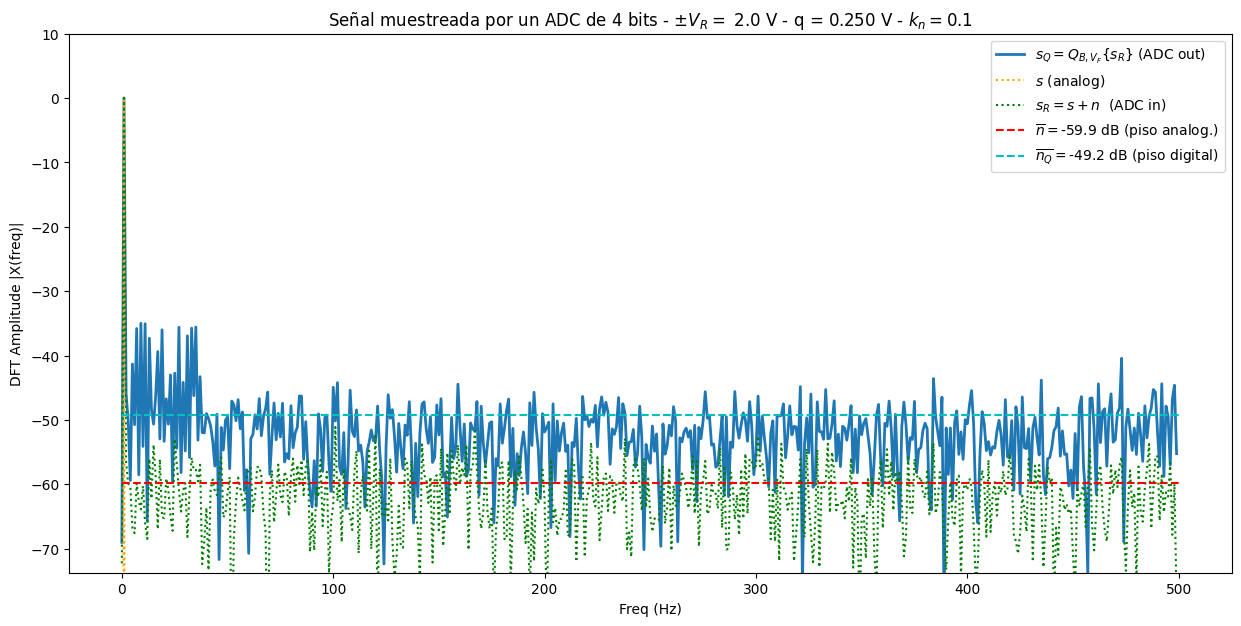

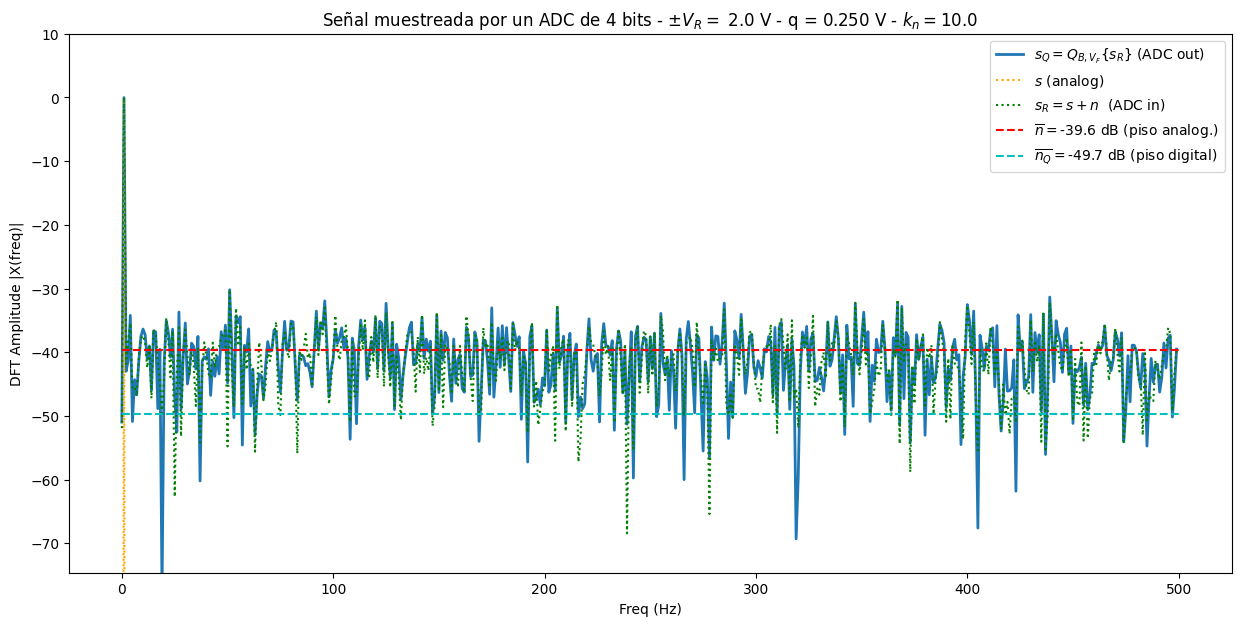

In [189]:
print('Caso 1:\n4 Bits con distintos valores de k_n')

#%%  Valores de parámetros
kn1=0.1#Relación de potencias de Ruido Pn = kn * Pq
B = 4 #Número de Bits
q = Vref/(2**(B-1))
Pq = (q**2)/12
sigma = kn1*Pq#(10**(-SNR/10)) #Varianza
desvio = sigma**0.5 #Desvío Estándar

#%%Obtengo señal con ruido y su versión cuantizada 

tt, s = my_sin_gen(vmax = Ac, dc = DC, fo = Fo, ph=tita, nn = N, fs = Fs )
#Genero señal aleatoria para el ruido
na=np.random.normal(0, desvio, len(tt))

ss = s + na

ssq = cuantificar(signal = ss,bits = B,vref = Vref)#4Bits
Xq1 = ssq - ss#Estimación ruido de cuantización

#%%Espectro de señal cuantizada y de la estimación de ruido
tt2=tt[0:N//2]
#Lo que Ingresa al ADC
TFF=np.fft.fft(ss)/N#Espectro de la señal que ingresa en el ADC
mod=10*np.log10(2*np.abs(TFF)**2)
#Señal Cuantizada
TFF1=np.fft.fft(ssq)/N#Espectro de la señal cuantizada
mod1=10*np.log10(2*np.abs(TFF1)**2)
#Señal Anal´´ogica sin Ruido
TFF2=np.fft.fft(s)/N#Espectro de la señal sin ruido
mod2=10*np.log10(2*np.abs(TFF2)**2)
#Ruido Analógico
TFFean=np.fft.fft(na)/N#Espectro de la estimacion de ruido de cuantizacion
modea=10*np.log10(2*np.abs(TFFean)**2)
#Ruido de Cuantización
TFFq1=np.fft.fft(Xq1)/N#Espectro del ruido 4 Bits
modq1=10*np.log10(2*np.abs(TFFq1)**2)#10*np.log10(escala)

Nq = np.mean(np.abs(TFFq1**2))
NqdB=10*np.log10(2*Nq)#10*np.log10(escala)
ff = tt2*len(tt2)*df*2

Na = np.mean(np.abs(TFFean**2))
NadB=10*np.log10(2*Na)

plt.figure("DFT Senoidal Cuantizada ",figsize=(15, 7))
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V - $k_n = {:3.1f}$'.format(B, Vref, q,kn) )
plt.plot(tt2*len(tt2)*df*2, mod1[0:N//2],lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)')
plt.plot(tt2*len(tt2)*df*2, mod2[0:N//2], color='orange', ls='dotted', label='$ s $ (analog)')
plt.plot(tt2*len(tt2)*df*2, mod[0:N//2],':g', label='$ s_R = s + n $  (ADC in)' ) 
plt.plot( np.array([ ff[0], Fs/2] ), [NadB,NadB], '--r', label= '$ \overline{n} = $' + '{:3.1f} dB (piso analog.)'.format(NadB))
plt.plot(np.array([ ff[0], Fs/2] ), [NqdB,NqdB], '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB (piso digital)'.format(NqdB))

plt.xlabel("Freq (Hz)")
plt.ylabel("DFT Amplitude |X(freq)|")
plt.ylim((1.5*NqdB,10))
plt.legend()
plt.show()

#%%  Valores de parámetros
kn1=10#Relación de potencias de Ruido Pn = kn * Pq
B = 4 #Número de Bits
q = Vref/(2**(B-1))
Pq = (q**2)/12
sigma = kn1*Pq#(10**(-SNR/10)) #Varianza
desvio = sigma**0.5 #Desvío Estándar
#%%Obtengo señal con ruido y su versión cuantizada 

tt, s = my_sin_gen(vmax = Ac, dc = DC, fo = Fo, ph=tita, nn = N, fs = Fs )
#Genero señal aleatoria para el ruido
na=np.random.normal(0, desvio, len(tt))

ss = s + na

ssq = cuantificar(signal = ss,bits = B,vref = Vref)#4Bits
Xq1 = ssq - ss#Estimación ruido de cuantización

#%%Espectro de señal cuantizada y de la estimación de ruido
tt2=tt[0:N//2]
#Lo que Ingresa al ADC
TFF=np.fft.fft(ss)/N#Espectro de la señal que ingresa en el ADC
mod=10*np.log10(2*np.abs(TFF)**2)
#Señal Cuantizada
TFF1=np.fft.fft(ssq)/N#Espectro de la señal cuantizada
mod1=10*np.log10(2*np.abs(TFF1)**2)
#Señal Anal´´ogica sin Ruido
TFF2=np.fft.fft(s)/N#Espectro de la señal sin ruido
mod2=10*np.log10(2*np.abs(TFF2)**2)
#Ruido Analógico
TFFean=np.fft.fft(na)/N#Espectro de la estimacion de ruido de cuantizacion
modea=10*np.log10(2*np.abs(TFFean)**2)
#Ruido de Cuantización
TFFq1=np.fft.fft(Xq1)/N#Espectro del ruido 4 Bits
modq1=10*np.log10(2*np.abs(TFFq1)**2)#10*np.log10(escala)

Nq = np.mean(np.abs(TFFq1**2))
NqdB=10*np.log10(2*Nq)#10*np.log10(escala)
ff = tt2*len(tt2)*df*2

Na = np.mean(np.abs(TFFean**2))
NadB=10*np.log10(2*Na)

plt.figure("DFT Senoidal Cuantizada ",figsize=(15, 7))
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V - $k_n = {:3.1f}$'.format(B, Vref, q,kn1) )
plt.plot(tt2*len(tt2)*df*2, mod1[0:N//2],lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)')
plt.plot(tt2*len(tt2)*df*2, mod2[0:N//2], color='orange', ls='dotted', label='$ s $ (analog)')
plt.plot(tt2*len(tt2)*df*2, mod[0:N//2],':g', label='$ s_R = s + n $  (ADC in)' ) 
plt.plot( np.array([ ff[0], Fs/2] ), [NadB,NadB], '--r', label= '$ \overline{n} = $' + '{:3.1f} dB (piso analog.)'.format(NadB))
plt.plot(np.array([ ff[0], Fs/2] ), [NqdB,NqdB], '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB (piso digital)'.format(NqdB))

plt.xlabel("Freq (Hz)")
plt.ylabel("DFT Amplitude |X(freq)|")
plt.ylim((1.5*NqdB,10))
plt.legend()
plt.show()

### Se observa que al variar el valor de kn cambia la relación en los pisos de ruido

Caso 2:
8 Bits con distintos valores de k_n


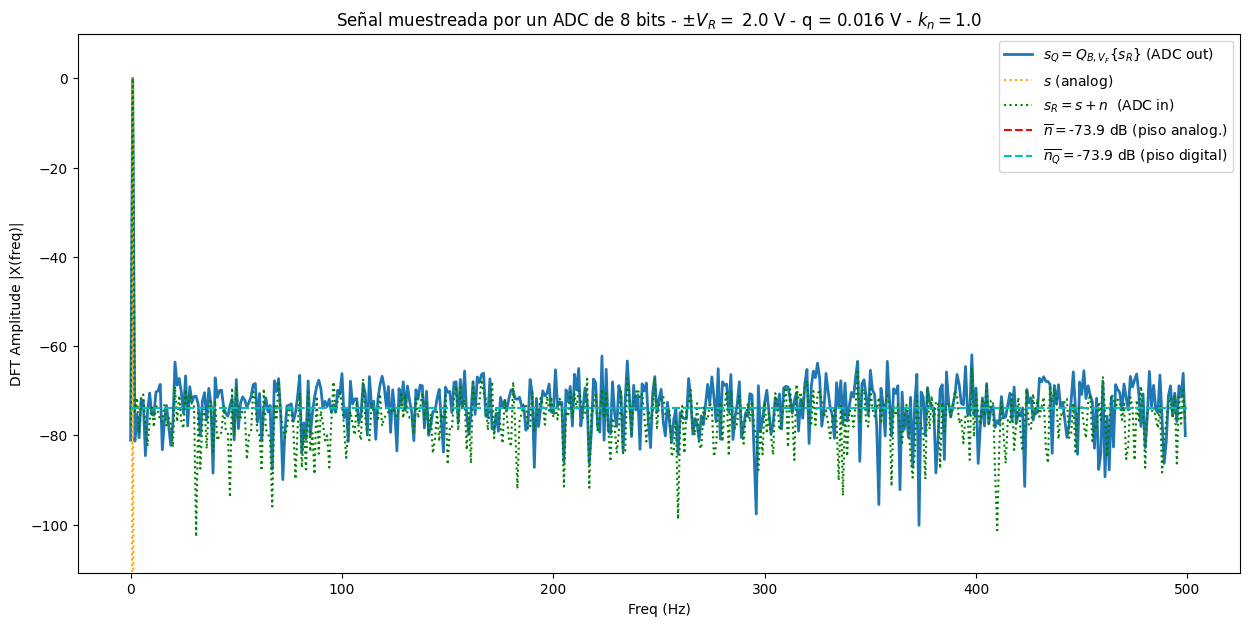

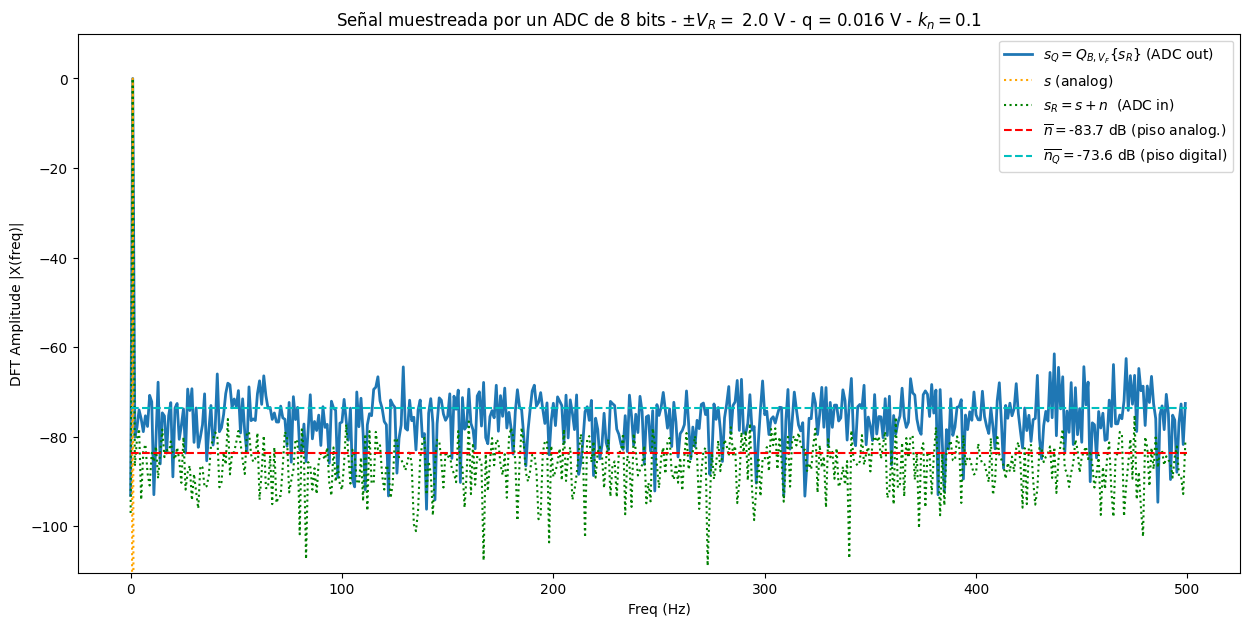

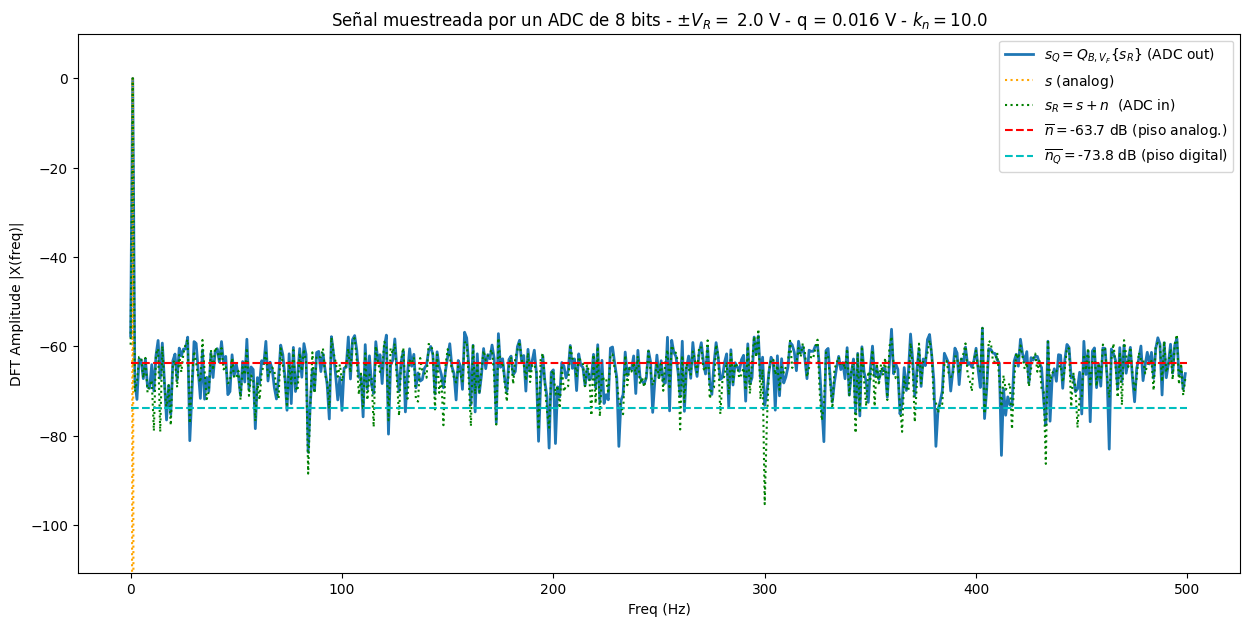

In [205]:
print('Caso 2:\n8 Bits con distintos valores de k_n')

#%%  Valores de parámetros
kn=1#Relación de potencias de Ruido Pn = kn * Pq
B = 8 #Número de Bits
q = Vref/(2**(B-1))
Pq = (q**2)/12
sigma = kn*Pq#(10**(-SNR/10)) #Varianza
desvio = sigma**0.5 #Desvío Estándar

kn1=0.1#Relación de potencias de Ruido Pn = kn * Pq
sigma1 = kn1*Pq#(10**(-SNR/10)) #Varianza
desvio1 = sigma1**0.5 #Desvío Estándar


kn2=10#Relación de potencias de Ruido Pn = kn * Pq
sigma2 = kn2*Pq#(10**(-SNR/10)) #Varianza
desvio2 = sigma2**0.5 #Desvío Estándar
#%%Obtengo señal con ruido y su versión cuantizada 
tt, s = my_sin_gen(vmax = Ac, dc = DC, fo = Fo, ph=tita, nn = N, fs = Fs )
#Genero señal aleatoria para el ruido
na=np.random.normal(0, desvio, len(tt))
na1=np.random.normal(0, desvio1, len(tt))
na2=np.random.normal(0, desvio2, len(tt))

ss = s + na
ss1 = s + na1
ss2 = s + na2

ssq = cuantificar(signal = ss,bits = B,vref = Vref)#4Bits
Xq = ssq - ss#Estimación ruido de cuantización
ssq1 = cuantificar(signal = ss1,bits = B,vref = Vref)#4Bits
Xq1 = ssq1 - ss1#Estimación ruido de cuantización
ssq2 = cuantificar(signal = ss2,bits = B,vref = Vref)#4Bits
Xq2 = ssq2 - ss2#Estimación ruido de cuantización

#%%Espectro de señal cuantizada y de la estimación de ruido
#Kn = 1
tt2=tt[0:N//2]
#Lo que Ingresa al ADC
TFF=np.fft.fft(ss)/N#Espectro de la señal que ingresa en el ADC
mod=10*np.log10(2*np.abs(TFF)**2)
#Señal Cuantizada
TFF1=np.fft.fft(ssq)/N#Espectro de la señal cuantizada
mod1=10*np.log10(2*np.abs(TFF1)**2)
#Señal Anal´´ogica sin Ruido
TFF2=np.fft.fft(s)/N#Espectro de la señal sin ruido
mod2=10*np.log10(2*np.abs(TFF2)**2)
#Ruido Analógico
TFFean=np.fft.fft(na)/N#Espectro de la estimacion de ruido de cuantizacion
modea=10*np.log10(2*np.abs(TFFean)**2)
#Ruido de Cuantización
TFFq1=np.fft.fft(Xq)/N#Espectro del ruido 8 Bits
modq1=10*np.log10(2*np.abs(TFFq1)**2)#10*np.log10(escala)

Nq = np.mean(np.abs(TFFq1**2))
NqdB=10*np.log10(2*Nq)#10*np.log10(escala)
ff = tt2*len(tt2)*df*2

Na = np.mean(np.abs(TFFean**2))
NadB=10*np.log10(2*Na)

plt.figure("DFT Senoidal Cuantizada ",figsize=(15, 7))
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V - $k_n = {:3.1f}$'.format(B, Vref, q,kn) )
plt.plot(tt2*len(tt2)*df*2, mod1[0:N//2],lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)')
plt.plot(tt2*len(tt2)*df*2, mod2[0:N//2], color='orange', ls='dotted', label='$ s $ (analog)')
plt.plot(tt2*len(tt2)*df*2, mod[0:N//2],':g', label='$ s_R = s + n $  (ADC in)' ) 
plt.plot( np.array([ ff[0], Fs/2] ), [NadB,NadB], '--r', label= '$ \overline{n} = $' + '{:3.1f} dB (piso analog.)'.format(NadB))
plt.plot(np.array([ ff[0], Fs/2] ), [NqdB,NqdB], '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB (piso digital)'.format(NqdB))

plt.xlabel("Freq (Hz)")
plt.ylabel("DFT Amplitude |X(freq)|")
plt.ylim((1.5*NqdB,10))
plt.legend()
plt.show()

#Kn = 0.1
tt2=tt[0:N//2]
#Lo que Ingresa al ADC
TFF=np.fft.fft(ss1)/N#Espectro de la señal que ingresa en el ADC
mod=10*np.log10(2*np.abs(TFF)**2)
#Señal Cuantizada
TFF1=np.fft.fft(ssq1)/N#Espectro de la señal cuantizada
mod1=10*np.log10(2*np.abs(TFF1)**2)
#Señal Anal´´ogica sin Ruido
TFF2=np.fft.fft(s)/N#Espectro de la señal sin ruido
mod2=10*np.log10(2*np.abs(TFF2)**2)
#Ruido Analógico
TFFean=np.fft.fft(na1)/N#Espectro de la estimacion de ruido de cuantizacion
modea=10*np.log10(2*np.abs(TFFean)**2)
#Ruido de Cuantización
TFFq1=np.fft.fft(Xq1)/N#Espectro del ruido 8 Bits
modq1=10*np.log10(2*np.abs(TFFq1)**2)#10*np.log10(escala)

Nq = np.mean(np.abs(TFFq1**2))
NqdB=10*np.log10(2*Nq)#10*np.log10(escala)
ff = tt2*len(tt2)*df*2

Na = np.mean(np.abs(TFFean**2))
NadB=10*np.log10(2*Na)

plt.figure("DFT Senoidal Cuantizada ",figsize=(15, 7))
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V - $k_n = {:3.1f}$'.format(B, Vref, q,kn1) )
plt.plot(tt2*len(tt2)*df*2, mod1[0:N//2],lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)')
plt.plot(tt2*len(tt2)*df*2, mod2[0:N//2], color='orange', ls='dotted', label='$ s $ (analog)')
plt.plot(tt2*len(tt2)*df*2, mod[0:N//2],':g', label='$ s_R = s + n $  (ADC in)' ) 
plt.plot( np.array([ ff[0], Fs/2] ), [NadB,NadB], '--r', label= '$ \overline{n} = $' + '{:3.1f} dB (piso analog.)'.format(NadB))
plt.plot(np.array([ ff[0], Fs/2] ), [NqdB,NqdB], '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB (piso digital)'.format(NqdB))

plt.xlabel("Freq (Hz)")
plt.ylabel("DFT Amplitude |X(freq)|")
plt.ylim((1.5*NqdB,10))
plt.legend()
plt.show()

#Kn = 10
tt2=tt[0:N//2]
#Lo que Ingresa al ADC
TFF=np.fft.fft(ss2)/N#Espectro de la señal que ingresa en el ADC
mod=10*np.log10(2*np.abs(TFF)**2)
#Señal Cuantizada
TFF1=np.fft.fft(ssq2)/N#Espectro de la señal cuantizada
mod1=10*np.log10(2*np.abs(TFF1)**2)
#Señal Anal´´ogica sin Ruido
TFF2=np.fft.fft(s)/N#Espectro de la señal sin ruido
mod2=10*np.log10(2*np.abs(TFF2)**2)
#Ruido Analógico
TFFean=np.fft.fft(na2)/N#Espectro de la estimacion de ruido de cuantizacion
modea=10*np.log10(2*np.abs(TFFean)**2)
#Ruido de Cuantización
TFFq1=np.fft.fft(Xq2)/N#Espectro del ruido 8 Bits
modq1=10*np.log10(2*np.abs(TFFq1)**2)#10*np.log10(escala)

Nq = np.mean(np.abs(TFFq1**2))
NqdB=10*np.log10(2*Nq)#10*np.log10(escala)
ff = tt2*len(tt2)*df*2

Na = np.mean(np.abs(TFFean**2))
NadB=10*np.log10(2*Na)

plt.figure("DFT Senoidal Cuantizada ",figsize=(15, 7))
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V - $k_n = {:3.1f}$'.format(B, Vref, q,kn2) )
plt.plot(tt2*len(tt2)*df*2, mod1[0:N//2],lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)')
plt.plot(tt2*len(tt2)*df*2, mod2[0:N//2], color='orange', ls='dotted', label='$ s $ (analog)')
plt.plot(tt2*len(tt2)*df*2, mod[0:N//2],':g', label='$ s_R = s + n $  (ADC in)' ) 
plt.plot( np.array([ ff[0], Fs/2] ), [NadB,NadB], '--r', label= '$ \overline{n} = $' + '{:3.1f} dB (piso analog.)'.format(NadB))
plt.plot(np.array([ ff[0], Fs/2] ), [NqdB,NqdB], '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB (piso digital)'.format(NqdB))

plt.xlabel("Freq (Hz)")
plt.ylabel("DFT Amplitude |X(freq)|")
plt.ylim((1.5*NqdB,10))
plt.legend()
plt.show()




### Cambiando la cantidad de bits se observa (como se esperaba) que el piso de ruido de cuantización bajó considerablemente y al variar el kn se obtiene el mismo efecto que en el caso de 4 bits

Caso 2:
8 Bits con distintos valores de k_n


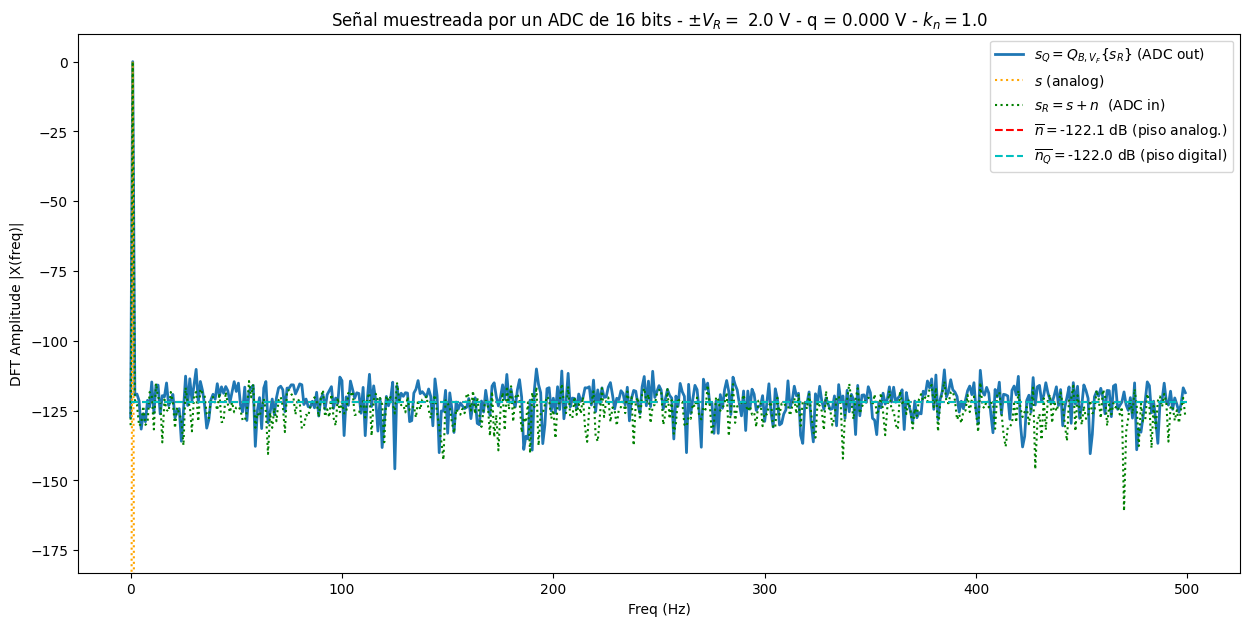

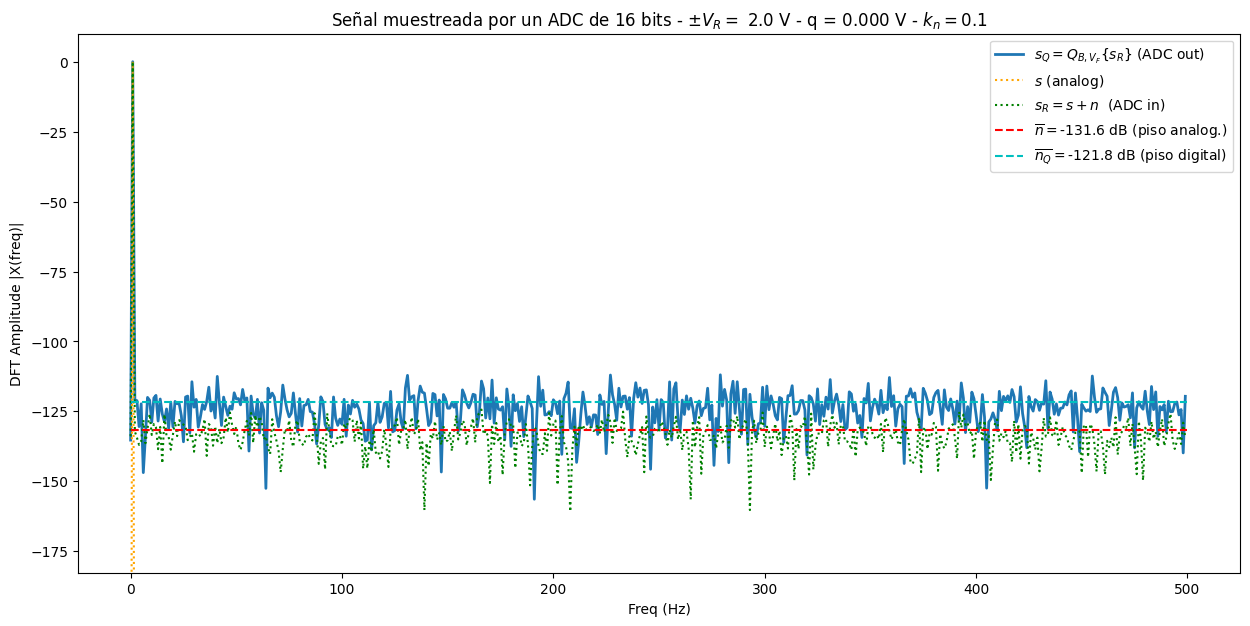

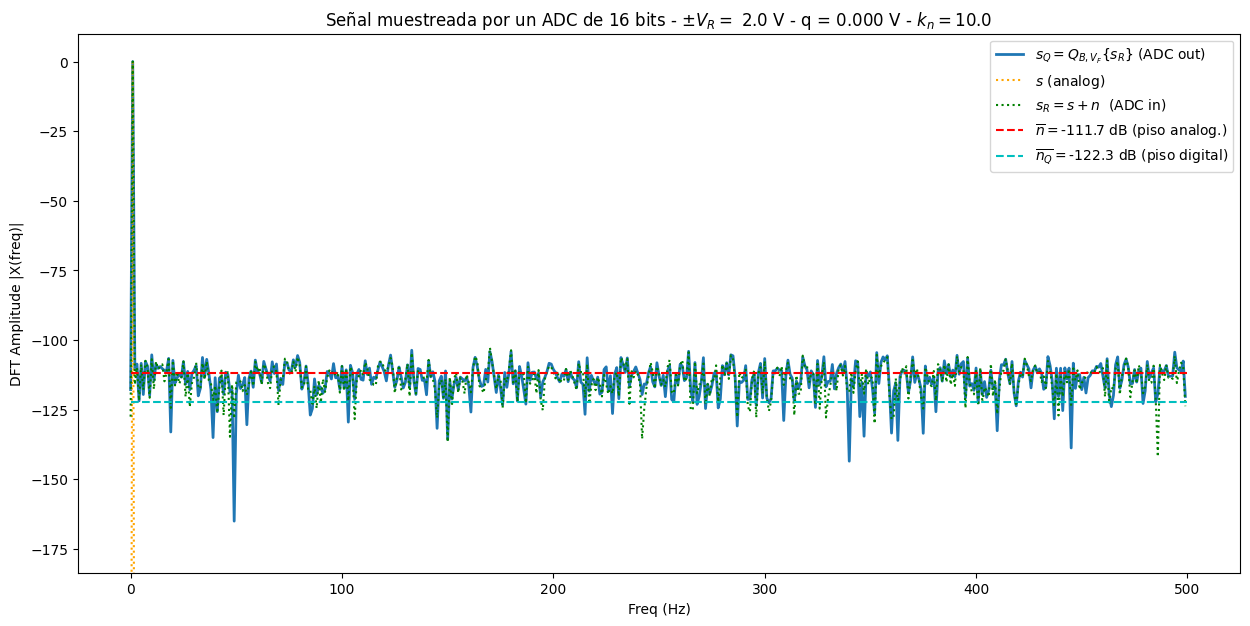

In [206]:
print('Caso 2:\n8 Bits con distintos valores de k_n')

#%%  Valores de parámetros
kn=1#Relación de potencias de Ruido Pn = kn * Pq
B = 16 #Número de Bits
q = Vref/(2**(B-1))
Pq = (q**2)/12
sigma = kn*Pq#(10**(-SNR/10)) #Varianza
desvio = sigma**0.5 #Desvío Estándar

kn1=0.1#Relación de potencias de Ruido Pn = kn * Pq
sigma1 = kn1*Pq#(10**(-SNR/10)) #Varianza
desvio1 = sigma1**0.5 #Desvío Estándar


kn2=10#Relación de potencias de Ruido Pn = kn * Pq
sigma2 = kn2*Pq#(10**(-SNR/10)) #Varianza
desvio2 = sigma2**0.5 #Desvío Estándar
#%%Obtengo señal con ruido y su versión cuantizada 
tt, s = my_sin_gen(vmax = Ac, dc = DC, fo = Fo, ph=tita, nn = N, fs = Fs )
#Genero señal aleatoria para el ruido
na=np.random.normal(0, desvio, len(tt))
na1=np.random.normal(0, desvio1, len(tt))
na2=np.random.normal(0, desvio2, len(tt))

ss = s + na
ss1 = s + na1
ss2 = s + na2

ssq = cuantificar(signal = ss,bits = B,vref = Vref)#16Bits
Xq = ssq - ss#Estimación ruido de cuantización
ssq1 = cuantificar(signal = ss1,bits = B,vref = Vref)#16Bits
Xq1 = ssq1 - ss1#Estimación ruido de cuantización
ssq2 = cuantificar(signal = ss2,bits = B,vref = Vref)#16Bits
Xq2 = ssq2 - ss2#Estimación ruido de cuantización

#%%Espectro de señal cuantizada y de la estimación de ruido
#Kn = 1
tt2=tt[0:N//2]
#Lo que Ingresa al ADC
TFF=np.fft.fft(ss)/N#Espectro de la señal que ingresa en el ADC
mod=10*np.log10(2*np.abs(TFF)**2)
#Señal Cuantizada
TFF1=np.fft.fft(ssq)/N#Espectro de la señal cuantizada
mod1=10*np.log10(2*np.abs(TFF1)**2)
#Señal Anal´´ogica sin Ruido
TFF2=np.fft.fft(s)/N#Espectro de la señal sin ruido
mod2=10*np.log10(2*np.abs(TFF2)**2)
#Ruido Analógico
TFFean=np.fft.fft(na)/N#Espectro de la estimacion de ruido de cuantizacion
modea=10*np.log10(2*np.abs(TFFean)**2)
#Ruido de Cuantización
TFFq1=np.fft.fft(Xq)/N#Espectro del ruido 16 Bits
modq1=10*np.log10(2*np.abs(TFFq1)**2)#10*np.log10(escala)

Nq = np.mean(np.abs(TFFq1**2))
NqdB=10*np.log10(2*Nq)#10*np.log10(escala)
ff = tt2*len(tt2)*df*2

Na = np.mean(np.abs(TFFean**2))
NadB=10*np.log10(2*Na)

plt.figure("DFT Senoidal Cuantizada ",figsize=(15, 7))
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V - $k_n = {:3.1f}$'.format(B, Vref, q,kn) )
plt.plot(tt2*len(tt2)*df*2, mod1[0:N//2],lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)')
plt.plot(tt2*len(tt2)*df*2, mod2[0:N//2], color='orange', ls='dotted', label='$ s $ (analog)')
plt.plot(tt2*len(tt2)*df*2, mod[0:N//2],':g', label='$ s_R = s + n $  (ADC in)' ) 
plt.plot( np.array([ ff[0], Fs/2] ), [NadB,NadB], '--r', label= '$ \overline{n} = $' + '{:3.1f} dB (piso analog.)'.format(NadB))
plt.plot(np.array([ ff[0], Fs/2] ), [NqdB,NqdB], '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB (piso digital)'.format(NqdB))

plt.xlabel("Freq (Hz)")
plt.ylabel("DFT Amplitude |X(freq)|")
plt.ylim((1.5*NqdB,10))
plt.legend()
plt.show()

#Kn = 0.1
tt2=tt[0:N//2]
#Lo que Ingresa al ADC
TFF=np.fft.fft(ss1)/N#Espectro de la señal que ingresa en el ADC
mod=10*np.log10(2*np.abs(TFF)**2)
#Señal Cuantizada
TFF1=np.fft.fft(ssq1)/N#Espectro de la señal cuantizada
mod1=10*np.log10(2*np.abs(TFF1)**2)
#Señal Anal´´ogica sin Ruido
TFF2=np.fft.fft(s)/N#Espectro de la señal sin ruido
mod2=10*np.log10(2*np.abs(TFF2)**2)
#Ruido Analógico
TFFean=np.fft.fft(na1)/N#Espectro de la estimacion de ruido de cuantizacion
modea=10*np.log10(2*np.abs(TFFean)**2)
#Ruido de Cuantización
TFFq1=np.fft.fft(Xq1)/N#Espectro del ruido 16 Bits
modq1=10*np.log10(2*np.abs(TFFq1)**2)#10*np.log10(escala)

Nq = np.mean(np.abs(TFFq1**2))
NqdB=10*np.log10(2*Nq)#10*np.log10(escala)
ff = tt2*len(tt2)*df*2

Na = np.mean(np.abs(TFFean**2))
NadB=10*np.log10(2*Na)

plt.figure("DFT Senoidal Cuantizada ",figsize=(15, 7))
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V - $k_n = {:3.1f}$'.format(B, Vref, q,kn1) )
plt.plot(tt2*len(tt2)*df*2, mod1[0:N//2],lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)')
plt.plot(tt2*len(tt2)*df*2, mod2[0:N//2], color='orange', ls='dotted', label='$ s $ (analog)')
plt.plot(tt2*len(tt2)*df*2, mod[0:N//2],':g', label='$ s_R = s + n $  (ADC in)' ) 
plt.plot( np.array([ ff[0], Fs/2] ), [NadB,NadB], '--r', label= '$ \overline{n} = $' + '{:3.1f} dB (piso analog.)'.format(NadB))
plt.plot(np.array([ ff[0], Fs/2] ), [NqdB,NqdB], '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB (piso digital)'.format(NqdB))

plt.xlabel("Freq (Hz)")
plt.ylabel("DFT Amplitude |X(freq)|")
plt.ylim((1.5*NqdB,10))
plt.legend()
plt.show()

#Kn = 10
tt2=tt[0:N//2]
#Lo que Ingresa al ADC
TFF=np.fft.fft(ss2)/N#Espectro de la señal que ingresa en el ADC
mod=10*np.log10(2*np.abs(TFF)**2)
#Señal Cuantizada
TFF1=np.fft.fft(ssq2)/N#Espectro de la señal cuantizada
mod1=10*np.log10(2*np.abs(TFF1)**2)
#Señal Anal´´ogica sin Ruido
TFF2=np.fft.fft(s)/N#Espectro de la señal sin ruido
mod2=10*np.log10(2*np.abs(TFF2)**2)
#Ruido Analógico
TFFean=np.fft.fft(na2)/N#Espectro de la estimacion de ruido de cuantizacion
modea=10*np.log10(2*np.abs(TFFean)**2)
#Ruido de Cuantización
TFFq1=np.fft.fft(Xq2)/N#Espectro del ruido 16 Bits
modq1=10*np.log10(2*np.abs(TFFq1)**2)#10*np.log10(escala)

Nq = np.mean(np.abs(TFFq1**2))
NqdB=10*np.log10(2*Nq)#10*np.log10(escala)
ff = tt2*len(tt2)*df*2

Na = np.mean(np.abs(TFFean**2))
NadB=10*np.log10(2*Na)

plt.figure("DFT Senoidal Cuantizada ",figsize=(15, 7))
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V - $k_n = {:3.1f}$'.format(B, Vref, q,kn2) )
plt.plot(tt2*len(tt2)*df*2, mod1[0:N//2],lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)')
plt.plot(tt2*len(tt2)*df*2, mod2[0:N//2], color='orange', ls='dotted', label='$ s $ (analog)')
plt.plot(tt2*len(tt2)*df*2, mod[0:N//2],':g', label='$ s_R = s + n $  (ADC in)' ) 
plt.plot( np.array([ ff[0], Fs/2] ), [NadB,NadB], '--r', label= '$ \overline{n} = $' + '{:3.1f} dB (piso analog.)'.format(NadB))
plt.plot(np.array([ ff[0], Fs/2] ), [NqdB,NqdB], '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB (piso digital)'.format(NqdB))

plt.xlabel("Freq (Hz)")
plt.ylabel("DFT Amplitude |X(freq)|")
plt.ylim((1.5*NqdB,10))
plt.legend()
plt.show()


### En este caso el ruido de cuantización es ridículamente bajo dado la gran cantidad de bits disponibles, los efectos del kn se mantiene constantes al variar la cantidad de bits (La diferencia entre niveles es la misma para cada caso) 

# Conclusiones

Se simularon y graficaron distintos casos, donde se varió la SNR de la señal analógica y también la cantidad de bits del ADC. Esto generó resultados muy interesantes, por un lado se observa que si la SNR es muy alta y se tiene una señal muy pura, se deberá utilizar un ADC de mejor calidad ya que en caso contrario el ruido de cuantización estará muchos decibeles por encima del ruido analógico e interferirá con el análisis de la señal. Por otro lado, si la SNR es muy baja y se tiene una señal muy ruidosa, es un desperdicio utilizar tantos bit del ADC ya que se estaría haciendo una cuantización extremadamente exigente cuando el ruido analógico predominará fácilmente. Por lo tanto se concluye que la mejor respuesta a este problema sería siempre utilizar una cuantización que genere un ruido en el orden del ruido de la señal analógica para que no se desperdicien recursos ni tampoco para que se agregue más ruido a la señal.
Según el Holton se llega a una expresión que relaciona el ruido analógico con el ruido de cuantización, la cual dependerá de la tensión de referencia del ADC y la cantidad de bits del mismo, de forma que:

SNR = $\\σ_A^2$ / $\\σ_q^2$ [dB] = 6.02 * B + 10 log(12) + 20 log($\\σ_A$) - 20 log(Vref)